# Fabler av Tor Åge Bringsværd

In [32]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import pandas as pd
import dhlab.graph_networkx_louvain as gnl
mu.css()

In [2]:
mu.code_toggle()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

Henter alle bøkene - viser de øverste treffene

In [125]:
blind=nb.book_corpus(title='blindpassasjer%')
blind

,urn,author,title,year
0,2014051405009,"Bye, Harald",Blindpassasjeren,2011
1,2010112208124,"Morgan, Diana",Blindpassasjeren,1991
2,2013020609508,"Bing, Jon",Blindpassasjer,2011
3,2013031906094,"Marey, Helen",Blindpassasjeren,1967
4,2011011106023,"Vatsend, Helge",Blindpassasjerer,1967
5,2015072108373,"Wentworth, Sally",Blindpassasjeren,1994
6,2012072505024,"Skulstad, Terje",Blindpassasjer,1978
7,2009031104031,"Bjorvatn, Asle Eivind",Blindpassasjeren,2000
8,2012083008067,,Blindpassasjer,2011


In [127]:
blindpassasjer = 2013020609508

In [126]:
nb.metadata(2013020609508)

[[2013020609508,
  'Bing, Jon',
  2011,
  'Blindpassasjer',
  'et science fiction-drama i tre episoder',
  '[Teatret vårt]',
  'drama',
  'fb8914937ed14c0667ec024bce17781d',
  'nob',
  '']]

In [83]:
bring = nb.book_corpus(author = 'Bringsværd%tor%', limit = 400)
len(bring)

220

In [195]:
bring[bring.title == 'Ruffen']

,urn,author,title,year
47,2014071706049,"Bringsværd, Tor Åge",Ruffen,1972
159,2016090648026,"Bringsværd, Tor Åge",Ruffen,2005


In [200]:
ruffen = 2014071706049

In [199]:
nb.urn_concordance(word='plutselig', urns=bring[bring.title == 'Ruffen'], size=20)

"Ruffen, Bringsværd, Tor Åge, 1972",sa Ruffen . Han syntes,plutselig,det hørtes så tamt ut
"Ruffen, Bringsværd, Tor Åge, 2005",sa Ruffen . Han syntes,plutselig,det hørtes så tamt ut


In [187]:
bring_rotter = nb.refine_book_urn(urns=nb.pure_urn(bring), words=['rotter', 'rotte', 'rottene'])

In [189]:
bring_katter = nb.refine_book_urn(urns=nb.pure_urn(bring), words=['katter', 'kattene', 'katten'])

In [191]:
bring_bibliotek = nb.refine_book_urn(urns=nb.pure_urn(bring), words=['bibliotek', 'biblioteket'])

In [193]:
bring_ape = nb.refine_book_urn(urns=nb.pure_urn(bring), words=['ape', 'aper','apene'])

In [194]:
bring_ape

[[2007080601118, 'Bringsværd, Tor Åge', 'Gobi', 1985],
 [2008012904053, 'Bringsværd, Tor Åge', 'Gobi', 1994],
 [2012070308083, 'Bringsværd, Tor Åge', 'Pustehull', 1989],
 [2012061906029, 'Bringsværd, Tor Åge', 'Ganesha', 2011],
 [2011100406011, 'Bringsværd, Tor Åge', 'Web', 2005],
 [2016022309012, 'Bringsværd, Tor Åge', 'Mowgli', 1996],
 [2012121007074, 'Bringsværd, Tor Åge', 'Gobi', 1987],
 [2014012108095, 'Bringsværd, Tor Åge', 'Syvsoverskens dystre frokost', 1981],
 [2007112801054, 'Bringsværd, Tor Åge', 'Ker Shus', 1993],
 [2012072505035, 'Bringsværd, Tor Åge', 'Minotauros', 1980],
 [2012022908020,
  'Bringsværd, Tor Åge',
  'Apachepikene farer frem over sletten ; Blondt hår ; Vinden, og andre tekster',
  1976],
 [2016062748066,
  'Bringsværd, Tor Åge',
  'Pinocchio-papirene ; Minotauros ; Ker Shus',
  1988],
 [2011062405053, 'Bringsværd, Tor Åge', 'Samtaler med svart hund', 2004],
 [2011070608017, 'Bringsværd, Tor Åge', 'gang var Buddha apenes konge', 2003],
 [2008100800012,
  'Br

In [192]:
bring_bibliotek

[[2014112008094, 'Bringsværd, Tor Åge', 'Pinocchio-papirene', 1982],
 [2014101408117, 'Bringsværd, Tor Åge', 'Karavane', 1974],
 [2011062405053, 'Bringsværd, Tor Åge', 'Samtaler med svart hund', 2004],
 [2013082708007, 'Bringsværd, Tor Åge', 'Kaptein Puma', 2013],
 [2013082808026,
  'Bringsværd, Tor Åge',
  'Karsten og Petra kler seg ut ; Karsten og Petra på biblioteket',
  2011],
 [2014022006139, 'Bringsværd, Tor Åge', 'Slipp håndtaket når du vrir', 2011],
 [2013071208048, 'Bringsværd, Tor Åge', 'Slipp håndtaket når du vrir', 2012],
 [2013112606056, 'Bringsværd, Tor Åge', 'Karsten og Petra på bondegård', 2003],
 [2014022406064,
  'Bringsværd, Tor Åge',
  'Karsten og Petra på biblioteket',
  2011],
 [2014120807635, 'Bringsværd, Tor Åge', 'Jentekraft', 2008],
 [2011062206078, 'Bringsværd, Tor Åge', 'London', 2003],
 [2008091204013, 'Bringsværd, Tor Åge', 'Gobi', 1998],
 [2016062748066,
  'Bringsværd, Tor Åge',
  'Pinocchio-papirene ; Minotauros ; Ker Shus',
  1988],
 [2013030505054,
  '

In [190]:
bring_katter

[[2009011204044, 'Bringsværd, Tor Åge', 'Gobi', 2002],
 [2012111508106, 'Bringsværd, Tor Åge', 'store farveslukeren', 1976],
 [2008120301012,
  'Bringsværd, Tor Åge',
  'Pudder? Pudder!, eller: Sleeping beauty in the valley of the wild, wild pigs',
  2001],
 [2008100804064, 'Bringsværd, Tor Åge', 'Beowulf', 1999],
 [2014101408117, 'Bringsværd, Tor Åge', 'Karavane', 1974],
 [2014062707145, 'Bringsværd, Tor Åge', 'Karsten og Petras verden', 2009],
 [2012092438009, 'Bringsværd, Tor Åge', 'store Ruffen boken', 2008],
 [2014111108038, 'Bringsværd, Tor Åge', 'Karsten har bursdag', 2001],
 [2013071208048, 'Bringsværd, Tor Åge', 'Slipp håndtaket når du vrir', 2012],
 [2014051206035, 'Bringsværd, Tor Åge', 'Mesterdetektiven Fellini', 2010],
 [2010052503023, 'Bringsværd, Tor Åge', 'Fellini og sirkusmysteriet', 1998],
 [2009012704069, 'Bringsværd, Tor Åge', 'To gode venner', 2002],
 [2014022006087, 'Bringsværd, Tor Åge', 'himmelske stresskoffert', 1989],
 [2013092507134, 'Bringsværd, Tor Åge', 'L

In [188]:
bring_rotter

[[2013071208048, 'Bringsværd, Tor Åge', 'Slipp håndtaket når du vrir', 2012],
 [2016020907613, 'Bringsværd, Tor Åge', 'Jakten på den skjulte elefant', 2006],
 [2007081700016,
  'Bringsværd, Tor Åge',
  'Tigergutt kommer til skogen og spiser frokost',
  1991],
 [2012021608177,
  'Bringsværd, Tor Åge',
  'Bløtkakemannen &amp; apache-pikene',
  1972],
 [2014112008094, 'Bringsværd, Tor Åge', 'Pinocchio-papirene', 1982],
 [2013072208044, 'Bringsværd, Tor Åge', 'Rekkverk', 2009],
 [2014022006139, 'Bringsværd, Tor Åge', 'Slipp håndtaket når du vrir', 2011],
 [2012121206164, 'Bringsværd, Tor Åge', 'Ker Shus', 1983],
 [2012072505035, 'Bringsværd, Tor Åge', 'Minotauros', 1980],
 [2013030505054,
  'Bringsværd, Tor Åge',
  'Den som har begge beina på jorda står stille, (eller: Alveolene kommer!)',
  1974],
 [2012121007074, 'Bringsværd, Tor Åge', 'Gobi', 1987],
 [2014040908096, 'Bringsværd, Tor Åge', 'Web', 2006],
 [2011062405053, 'Bringsværd, Tor Åge', 'Samtaler med svart hund', 2004],
 [200812030

In [123]:
bing = nb.book_corpus(author = 'bing,%jon%', limit = 400)
len(bing)

83

In [124]:
bing

,urn,author,title,year
0,2008031004058,"Bing, Jon",Piken som ble borte,1995
1,2012091705021,"Bing, Jon","Straffelovens definisjon av ""trykt skrift"" anvendt på datamaskinbaserte informasjonssystemer",1985
2,2012070608127,"Bing, Jon",Data protection in practice,1985
3,2007051504006,"Bing, Jon",Å miste et romskip,1969
4,2007072300092,"Bing, Jon",Det myke landskapet,1970
5,2012030508016,"Bing, Jon",Rettskildebruk og informasjonssystemer,1973
6,2010100508017,"Bing, Jon",Mizt,1997
7,2012070306152,"Bing, Jon",Knuteskrift,1974
8,2016052708035,"Bing, Jon","Alene, og fremtiden",1979
9,2014100106088,"Bing, Jon",Offentlighetsloven og EDB,1984


In [94]:
from IPython.display import HTML

In [107]:
pd.set_option('display.max_colwidth', -1)

In [112]:
styles = "<style>td {text-align:left;width:500px;color:'#aa4488'}</style>"

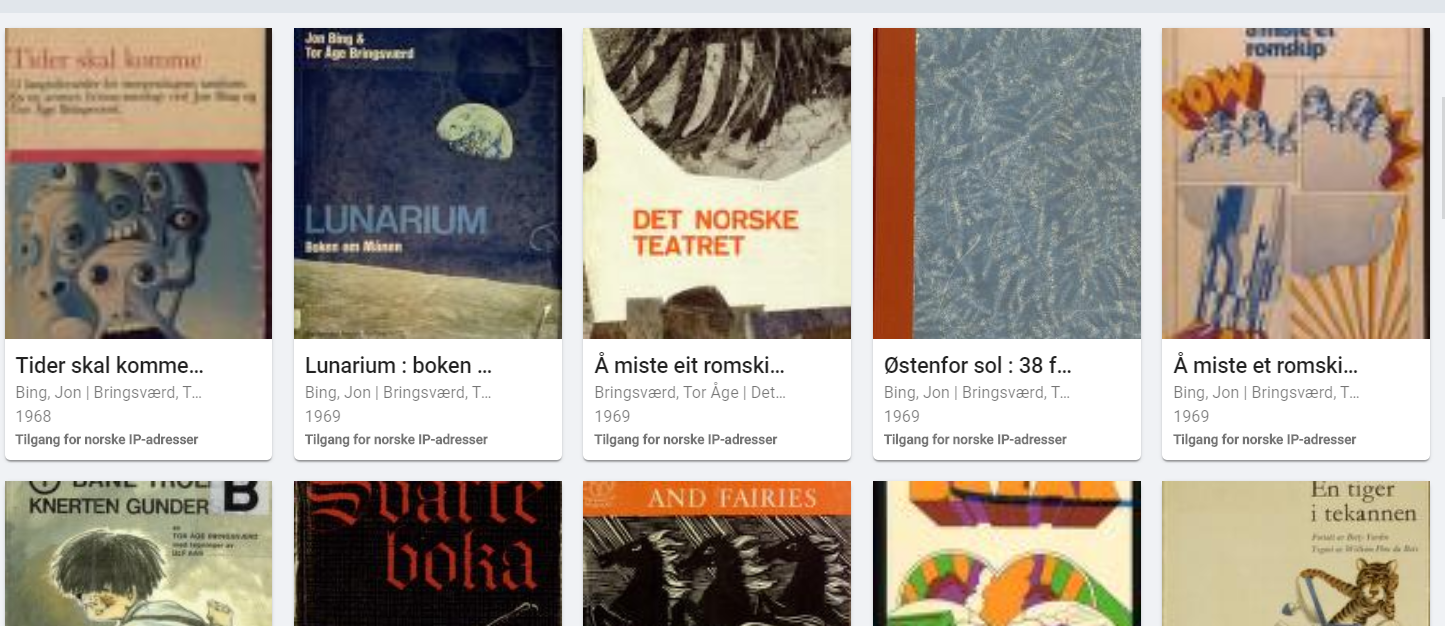

In [114]:
HTML( bring[['year', 'title',]].sort_values(by='year').to_html())

,year,title
124,1968,Probok
57,1970,Phantoms and fairies
210,1970,Bazar
47,1972,Ruffen
129,1972,Bløtkakemannen &amp; apache-pikene
140,1973,Jørgen Moes vei nr 13
85,1974,"Den som har begge beina på jorda står stille, (eller: Alveolene kommer!)"
217,1974,Det blå folket og karamell-fabrikken
94,1974,Jungelens herre
78,1974,Karavane


In [120]:
nb.metadata(nb.pure_urn(bring))

[[2008091504128,
  'Bringsværd, Tor Åge',
  1997,
  'Lilltrollet',
  '',
  'Scandinavian Film Group',
  'fiction',
  'b0e3a50e3f5df90839faa26deff92824',
  'swe',
  'nob'],
 [2008120301012,
  'Bringsværd, Tor Åge',
  2001,
  'Pudder? Pudder!, eller: Sleeping beauty in the valley of the wild, wild pigs',
  '',
  'Gyldendal',
  'fiction',
  'd1e3e04daa1e277d12f09be427510087',
  'nob',
  ''],
 [2012111508100,
  'Bringsværd, Tor Åge',
  2007,
  'Griseprat',
  'kulturkritiske samtaler med Nasse Nøff',
  'Dinamo forl.',
  'fiction',
  '5c660afc26ff096b2e04e71d9d88bb56',
  'nob',
  ''],
 [2015072908274,
  'Bringsværd, Tor Åge',
  2003,
  'Når to vil bli kjent med hverandre',
  '',
  'Gyldendal',
  'fiction',
  '9c2d90b10384848338576225cee31ca4',
  'nob',
  ''],
 [2009041404090,
  'Bringsværd, Tor Åge',
  1998,
  'Snipp, snapp, snute!',
  'tre eventyrspill',
  'Gyldendal Tiden',
  'fiction',
  '9a1a11d5681ff0688e7fdbac997c2fb6',
  'nob',
  ''],
 [2014050706045,
  'Bringsværd, Tor Åge',
  2006,


Summerer alle ordene i alle tekstene i korpuset, som skal brukes til sammenligning med bokhylla ellers

In [6]:
bring_agg = nb.aggregate_urns(nb.pure_urn(bring))

In [7]:
bring_df = nb.frame(bring_agg, 'counts')

In [8]:
nb.frame_sort(bring_df).head(5)

,counts
.,400060
",",150858
og,126742
det,89902
er,84631


Henter 50000 ord fra bokhylla

In [9]:
totals = nb.frame(nb.totals(50000), 'tot')

In [10]:
nb.frame_sort(totals).head(5)

,tot
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583


Normaliser og setter dem sammen for et lite display. Her er det høyest frekvens som gjelder, og interessant nok, er det mye punktum og lite komma i Bringsværs produksjon. Kan tyde på barnebøker.

In [11]:
nb.normalize_corpus_dataframe(bring_df)
nb.normalize_corpus_dataframe(totals)

True

In [12]:
nb.frame_sort(pd.concat([bring_df, totals], axis=1, sort=False)).head(10)

,counts,tot
.,0.073112,0.058921
",",0.027570,0.051453
og,0.023162,0.025297
i,0.014587,0.021425
det,0.016430,0.012728
som,0.012791,0.012343
til,0.010013,0.011847
er,0.015467,0.011580
av,0.009245,0.010948
en,0.012906,0.010783


Gjennomfører en sammenligning ved å dividere Bringsværs data på totalen for bokhylla.

In [13]:
compare = lambda x, y = totals['tot']: nb.frame_sort(nb.frame(x/y))

In [14]:
forskjell = compare(bring_df['counts'])

In [15]:
forskjell.head(10)

,0
Khan,88.724155
Nigel,81.561512
ANDERS,72.605932
Mika,71.875797
Loke,62.996699
Hildur,54.135528
Nøff,53.156186
Lester,49.357471
Lilli,40.031855
Ker,38.654280


Grupperer og sorterer resultatet på morfologiske (syntaktiske?) kategorier

In [16]:
def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Egennavn \n"
    navn += ', '.join(categories['propr'])
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += ', '.join(Grouping[cat]) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [17]:
mdprint(forskjell)

## Egennavn 
Khan, Nigel, ANDERS, Mika, Loke, Hildur, Nøff, Lester, Lilli, Ker, Dragen, Klen, Moes, Elvira, Wagner, Felix, Noa, Karsten, Munken, Odin, Zeus, Frigg, Thomassen, Ricardo, Harris, Balder, Saba, Hood, Stener, Brumm, Omar, Nana, Suzanne, Frøy, Harold, Maskin, Sebastian, Gudene, Petra, JOHAN, Robin, Ch, Odins, FAR, Blomst, Low, Bing, Frøya, Djevelen, Rikke, Po, Fleming, Billy, Hund, Venter, Grønn, Slår, Ludvik, Wolfgang, Tyr, Aina, Ennå, Koln, Lillebror, Genova, Salomo, Valhall, Jovisst, Hysj, GYLDENDAL, Lar, Lik, Igor, Løp, Antagelig, Kreta, Illustrert, Holder, Buddha, Legger, Spot, Marguerite, Altfor, Ler, Graham, Troll, Langsomt, Gregorius, Marian, Nicholas, MOR, Lenge, Snakker, Hermod, Månen, Ylva, Cornelia, Kam, ALLE, Fattige, Mu, Brent, Nemlig, Tvertimot, Drømmen, Budapest, Dr, Percy, Vera, Jomfruen, Dager, Egentlig, Katten, Merket, Myten, Kaptein, Benson, Maja, Maar, Kaj, Kiev, Himmelens, Eventyret, Holde, Står, Himalaya, Åge, Alene, Trær, Halen, Holdt, Len, Imorgen, Tor, Føttene, Lot, Alexandria, Shelley, Gatene, Tenker, Hverken, Jammen, Slik, Nok, ..., AUGUST, Setter, Skrevet, Rolig, Slipp, Javisst, Egner, Sier, Esther, Winther, Ve, Og, Jeremias, Døden, Høyt, Rart, Ulven, Sitter, Prinsen, Dyrene, Manhattan, Idag, Likevel, Hører, Hel, Verst, Grå, Natt, Vale, Kjente, Rådhuset, Nixon, Hugo, Salomos, Mørket, Potter, Dypt, Tull, Vokser, Hyde, Antonius, Tarzan, Augusta, Uten, Fer, Fuglen, Dronningen, Jensen, Trenger, Pia, Prøver, Kjenner, Burde, Tennene, Hardt, Gabrielle, Tegnet, Latteren, Veggene, Venn, FanF, Gerda, Satt, Forsiktig, Armand, Englene, Hunder, Musikken, Fienden, Trodde, Prøvde, Bestemor, Bena

## verb
ryster, roper, rotte, klovn, omfavner, katter, slikker, brøler, hyler, troll, forkledd, ape, rir, klapper, fakler, torvet, hvisker, tennes, kledt, lener, nøler, kryper, gnir, sverm, klør, rotter, spruter, vinker, blunker, klatrer, vrir, klore, snubler, synger, jubler, avbryter, vakler, sparker, bukker, freser, nikker, aper, velter, lytter, vridde, skotter, vennet, dunker, hugger, drømte, vifter, mumler, røvet, mave, stuper, drømmer, trommer, danser, våkner, vintre, omfavne, hakker, drypper, kysser, kniver, gjemmer, løper, tramper, nøste, stønner, ler, svelger, blåser, virret, fortelles, dirrer, tromme, flokker, skyver, spretter, dempes, gråter, dreper, statuer, snuser, bukter, forvandles, logg, smi, skryter, speider, dytter, piper, spir, tøys, gnager, forvandler, leter, spytter, svømmer, skynder, tusj, blør, flykter, klorte, vinger, sperrer, triller, buret, skjelver, drøm, jager, katt, slikke, krøller, harpe, stryker, kniper, pisker, husker, smiler, nynne, vandrer, sover, vrimler, røve, knuses, drager, boble, motsi, vokter, klamrer, piler, hekser, griser, lukker, snur, sluke, knurret, kvister, nøle, klappe, våger, marsjerer, slikket, raker, sluker, hale, tygger, flokket, løfter, røk, skimter, streifer, puster, narr, fjær, hopper, leker, skremmer, slakter, kneler, skvetter, svinger, rykker, stormer, rynker, krøpet, tilber, streker, trader, rygger, glitrer, bøyer, omfavnet, baller, slukker, knekker, myter, svinet, stanser, viker, rusk, hyle, rusler, feier, spådd, rull, krype, røver, gjentar, gapte, hoster, kolliderer, pels, forsto, orker, skraper, kork, griper, revner, skygger, pinner, nikke, risset, kryp, klipper, brøle, skarve, forvandlet, flokk, gris, ruller, rister, klø, pest, drepes, smeller, etterligne, klatre, brister, heks, kjemper, misforstå, gjemme, stokker, forhekset, sier, tørker, krangler, balanserer, hveste, ryker, sprekker, begir, skriker, jakter, stakket, gidder, strammer, dytt, flyr, tenker, ører, vugge, lengter, slange, smører, skremt, brenner, blander, huk, sleper, fletter, myldret, drømt, hamrer, fløyte, skremte, klump, hilser, flimret, innrømmer, hugget, kaster, pleier, hugg, slår, slanger, prikker, fektet, suget, bretter, frykter, svir, hover, herje, gnage, råtne, lyver, kanter, trenet, snuse, bitt, smidd, løpt, forvandle, rusle
## subst
munken, grimaser, stenene, tigeren, kattene, labyrinten, stener, rottene, dragen, labbene, ødemarken, maven, gudene, tiger, kjempen, elefant, prins, uhyret, skapninger, demoner, elefanten, ulver, elefanter, grisen, ulvene, robot, eventyrene, kjortel, labyrint, arken, labben, kamel, legender, snuten, dukken, klåtrer, hammeren, kameler, måne, skapning, oksen, demon, frosk, hodene, scenen, stenen, grotte, krigere, halen, omveier, barnebøker, eventyr, sten, navlen, monster, korstog, drømmen, grenen, løve, djevler, hunder, bjørner, eventyret, sletten, heltene, novellen, maskinene, morfar, gudinnen, okse, skapningen, løven, halvsirkel, esel, fløyten, speilbilde, hornene, rullen, øksen, tronen, røkelse, hjørner, jungel, murene, løver, fakkel, ropene, tåke, marken, guder, ugle, klode, skuespillerne, stamfar, falk, horn, sverdet, pelsen, tyven, katten, nebbet, musene, verdener, klørne, jungelen, bål, krukken, bensinstasjonen, pus, ulv, dyrene, fjærene, novelle, puslespill, vingene, snute, synene, greven, knute, grålysningen, legenden, trekkspill, helter, hvalen, jegerne, spydet, tegneserier, helten, ørene, trådene, knuter, knokler, fakter, mytene, hundene, grisene, teltene, sverd, pilegrimer, haven, stjernene, ungarsk, hammer, prosesjon, jammen, høvding, torden, lemen, krigerne, kråke, grådighet, krampe, røvere, rustning, kroppene, prinsessen, kjerra, muslimene, felttoget, kjepp, aske, stanken, sommerfugler, tyv, vesener, nesebor, virvar, fugler, jomfruer, tungen, smeden, statue, penselen, misforståelser, knuten, manuskriptet, kropper, reiret, sheriffen, ondskapen, skyene, ørnen, lunge, hekken, sne, pungen, hoder, grotten, ridderen, månen, måfå, gåter, harer, hund, gylden, stammen, nesen, skuespillet, tyver, bulter, sæd, faen, fredløs, dronningen, udødelighet, filler, dyret, djevel, tretoppene, svane, overkropp, regnvær, ørken, nebb, flokken, håndleddet, ødeleggelsen, planeten, hjelm, puten, englene, innbinding, skuespiller, hornet, bykset, bokhandel, kunster, mytologi, dagboken, kjeften, blekksprut, smia, flik, galskap
## adj
stumme, mektigere, merkeligste, eventyrlige, digert, mumlende, dinglende, digre, stripete, morsomste, vrient, hylende, diger, vandrende, avvergende, pipende, kåt, trassig, lodne, barbent, fjollete, usynlig, grådige, forbannede, umulige, skurrende, dovent, vitterlig, sleipe, fillete, lumske, livløs, merkelige, hårete, underjordisk, mektigste, hese, gærne, knudrete, tålmodige, resolutt, vanvittige, jævla, underjordiske, groteske, ulykkelige, skjeggete, sovende, innsmigrende, klokere, syngende, fantastiske, gapende, veldige, bent, magiske, rullende, gåtefulle, larmende, rastløse, uvirkelig, nattlige
## unknown
gudenes, fiction, jeF, seF, flyvende, farver, übevegelige, eF, gyldne, istykker, kaa, hverandre., meF, trance, husveggen, sammen., hij, ingenting., tvertimot, zijn, farve, verden., farvet, übevegelig, hidden, deF, ikveld, übegripelig, mumling, barndoms, luftens, embedsmenn
## prep
midtveis, bakenfor
## det
selveste
## adv
naturligvis


Finner vekstdiagram

In [204]:
ruff = nb.frame(nb.get_freq(ruffen, top=0, cutoff=0))

In [205]:
nb.normalize_corpus_dataframe(ruff)

True

In [207]:
ruff.head()

,0
.,0.058090
",",0.026636
»,0.022953
/,0.022103
«,0.021536


In [208]:
ruff_forskjell = compare(ruff[0])

In [209]:
ruff_forskjell

,0
Ludvik,1200.627703
Tusen,780.302084
tred,728.248021
svømme,573.064799
tredve,481.338807
Bestemor,477.694583
spruter,423.456171
søren,416.061136
krabber,322.799017
blekksprut,280.670530


In [210]:
mdprint(ruff_forskjell, cutoff=4)

## Egennavn 
Ludvik, Tusen, Bestemor, Dobbelt, Ombord, Stiklestad, Bf, SMS, Jh, HE, IC, Fabrikker, Dreyer, BI, Ku, DD, C2, Stormen, Ib, BY, PO, Theodor, Liker, PS, Sats, Cf, Hl, Fortsatt, Stakkars, ¥, Jonathan, NI, Slottet, SA, 525, LI, Egentlig, Søndag, Papir, Kapteinen, Br, Oi, Madsen, Sv, Au, Ci, Hi, MM, Times, SE, Rudolf, Skrift, Rana, Dens, LL, JJ, Ol, Selvfølgelig, Havet, Små, \, Fortell, NB, Bl, Langt, Li, OT, SS, Plutselig, Pl, Trygve, ■, Hm, Si, Hold, Cl, •, W, |, Al, ISBN, #, York, ®, Fredrik, $, ™, Takk, Først, @, Uten, 1972, Barn, 1974, /, Carl, Z, *, ^, 1977, &, New, Stavanger, Amerika, 1981, ', AV, Hadde, Hele, Ta, Hver, 20., Derfor, 111, Q, 000, <, Alle, Nå, Og, £, V, », }, R, Siden, >, «, M

## unknown
tred, strandkanten, oy, søvne, tjuefem, lll, ooo, bt, iS, fc, bunns, lill, ov, tf, herfrå, ft, rø, de., é, pkt., min., im, oo, aa
## verb
svømme, spruter, krabber, grunna, ynket, flaut, svømmer, måpte, stupe, svømte, besvimte, forkjølet, sprutet, vasset, brøler, lynte, kapp, tordnet, rynke, trente, bevæpnet, nys, glattet, overraske, jamret, slep, vrak, unnskyld, tygge, overfalt, stilnet, bade, vippet, ål, fli, gråter, erter, trykt, fæl, freste, ferde, telle, oppkalt, ertet, drage, stupte, røk, stø, rukket, troll, sjenert, gjemmer, synke, eske, fortapt, lærte, dukke, torde, blåste, blåse, rødmet, bukket, damp, hylte, viftet, pleier, blåser, redde, våkner, tau, ty, oppdage, trene, vinger, roper, bølger, slaget, hete, hvilte, li, forundret, skremt, rute, oppdager, sparket, tø, ul, kle, øy, binde, krøp, forsøkt, leker, vent, puste, storm, pustet, hoppe, plukket, skam, ly, skjønte, forsvunnet, sove, dukker, reddet, sky, forbauset, lettet, kanter, heter, ropte, løper, ild, slekt, vannet, skjøt, utgitt, glemte, hørtes, tett, tall, fly, trodd, løp, natt, syntes, kart, skjønner, sang, øye, vakt, sukket, oppgitt, dekket, trykk, passet, ment, bor, minne, slett, vokser, helse, stoppet, lære, hjelpe, drept, vende, nikket, rød, tekst, il, holdt, vann, sprang, spilte, brukte, kurs, forsvant, varm, nei, vær, hang, lot, huske, løs, redd, fart, spille, stakk, spørre, åtte, navn, laget, visst, sa, oppdaget, ende, fort, fint, holder, trengte, kaller, liker, venn, klarte, hender, fare, mørke, glede, fast, sier, åpne
## det
tredve, ni, ingen
## interj
søren
## subst
blekksprut, uvær, orkan, rakett, maven, eksemplarer, orkesteret, rusten, opplag, innbinding, stenene, raketter, bølgene, tirsdag, negler, uværet, stener, dragen, halen, slottet, knute, onkel, passasjerene, øya, fredag, måndag, onsdag, torsdag, foto, allting, sjokolade, etasjer, ferie, tåke, kinesisk, formiddag, vennene, skyene, båtene, horisonten, slott, maken, stormen, havnen, avskjed, mo, nesen, sirkel, haken, lørdag, bestemor, tjenesten, armene, ve, uhyre, dyrene, moro, w, vinduene, båten, q, sjøen, mil, menneskene, etasje, båt, y, sort, havet, v, blomster, pannen, pusten, natten, au, o, ø, hodet, halsen, sommeren, hår, boken, sengen, himmelen, r, glad, begynnelsen, vinduet, l, j, fe
## adj
svømmende, nyfødt, ekle, flinkere, irriterende, klokt, våt, mystisk, usynlig, ill, uhyggelig, fryktelig, fjernt, høflig, farlig, morsomt, deilig, forsiktig, synlig, stakkars, trist, verdt, alvorlig, vill, pent, ordentlig, antagelig, verste, sittende, syk, fin, enige, kaldt, vondt, dypt, ok, umulig, rolig, rundt, hardt
## prep
sydover
## fork
kl, fr, fl, ff
## adv
naturligvis


In [212]:
ruffen

2014071706049

In [213]:
ruff_graf = nb.make_network_graph(ruffen, list(ruff_forskjell.index)[:100])

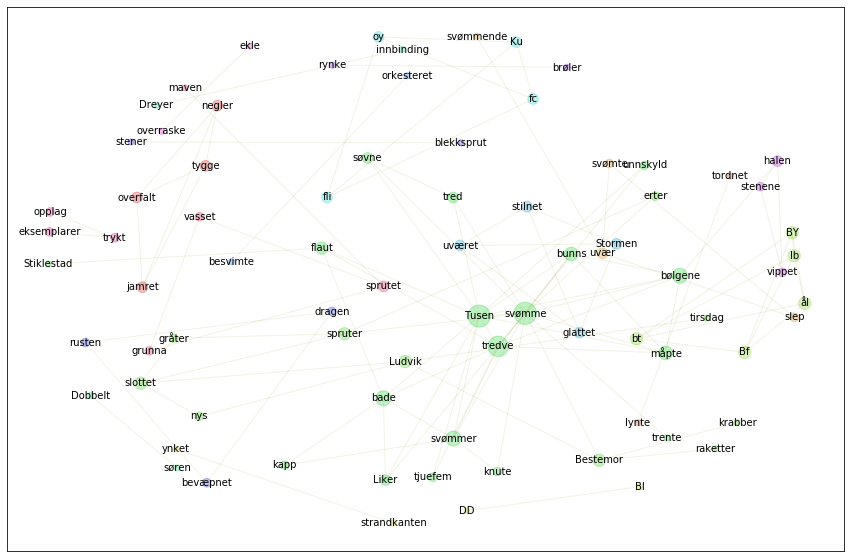

In [215]:
gnl.show_graph(ruff_graf, spread=0.8)

In [217]:
gnl.show_communities(ruff_graf)

BI-DD :  BI, DD

bt-Ib :  bt, Ib, BY, Bf, ål

Bestemor-Ludvik :  Bestemor, Ludvik, spruter, slottet, gråter, nys, erter, krabber, tirsdag, raketter

svømme-Tusen :  svømme, Tusen, tredve, svømmer, bølgene, bade, måpte, bunns, flaut, tred, Liker, søvne, tjuefem, kapp, unnskyld, knute, trente, Stiklestad

Dobbelt-søren :  Dobbelt, søren

innbinding-Dreyer :  innbinding, Dreyer

fc-oy :  fc, oy, fli, Ku

Stormen-stilnet :  Stormen, stilnet, glattet, uværet

orkesteret-besvimte :  orkesteret, besvimte

bevæpnet-dragen :  bevæpnet, dragen, rusten

stener-blekksprut :  stener, blekksprut

rynke-brøler :  rynke, brøler

halen-stenene :  halen, stenene, vippet

overraske-ekle :  overraske, ekle

opplag-eksemplarer :  opplag, eksemplarer, trykt

sprutet-vasset :  sprutet, vasset, grunna, maven

overfalt-negler :  overfalt, negler, jamret, tygge

tordnet-lynte :  tordnet, lynte

uvær-slep :  uvær, slep, svømte, svømmende

strandkanten-ynket :  strandkanten, ynket



In [220]:
ruff_dict = gnl.community_dict(ruff_graf)

In [221]:
ruff_dict

{'BI-DD': ['BI', 'DD'],
 'bt-Ib': ['bt', 'Ib', 'BY', 'Bf', 'ål'],
 'Bestemor-Ludvik': ['Bestemor',
  'Ludvik',
  'spruter',
  'slottet',
  'gråter',
  'nys',
  'erter',
  'krabber',
  'tirsdag',
  'raketter'],
 'svømme-Tusen': ['svømme',
  'Tusen',
  'tredve',
  'svømmer',
  'bølgene',
  'bade',
  'måpte',
  'bunns',
  'flaut',
  'tred',
  'Liker',
  'søvne',
  'tjuefem',
  'kapp',
  'unnskyld',
  'knute',
  'trente',
  'Stiklestad'],
 'Dobbelt-søren': ['Dobbelt', 'søren'],
 'innbinding-Dreyer': ['innbinding', 'Dreyer'],
 'fc-oy': ['fc', 'oy', 'fli', 'Ku'],
 'Stormen-stilnet': ['Stormen', 'stilnet', 'glattet', 'uværet'],
 'orkesteret-besvimte': ['orkesteret', 'besvimte'],
 'bevæpnet-dragen': ['bevæpnet', 'dragen', 'rusten'],
 'stener-blekksprut': ['stener', 'blekksprut'],
 'rynke-brøler': ['rynke', 'brøler'],
 'halen-stenene': ['halen', 'stenene', 'vippet'],
 'overraske-ekle': ['overraske', 'ekle'],
 'opplag-eksemplarer': ['opplag', 'eksemplarer', 'trykt'],
 'sprutet-vasset': ['sprutet

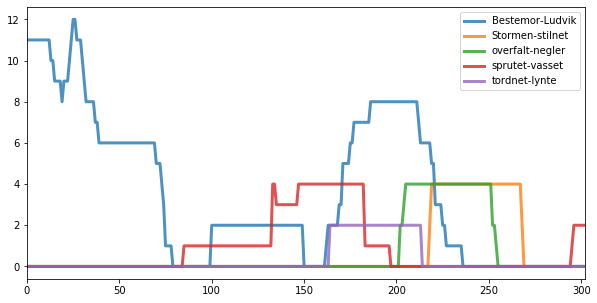

In [231]:
nb.plot_book_wordbags(ruffen, subdict(ruff_dict,[ "Bestemor-Ludvik", "Stormen-stilnet", "overfalt-negler", "sprutet-vasset", 'tordnet-lynte']), window=500, pr=10).plot(figsize=(10,5), lw=3, alpha=.8)

In [18]:
bring[bring.title == 'Vår verden er dugg']

,urn,author,title,year
18,2015091706060,"Bringsværd, Tor Åge",Vår verden er dugg,2014


In [19]:
dugg = nb.get_freq(2015091706060, top=0, cutoff=0)

In [20]:
dugg = nb.frame(dugg)
nb.normalize_corpus_dataframe(dugg)
dugg.head(10)

,0
.,0.063008
",",0.034066
og,0.025682
det,0.021352
jeg,0.021302
var,0.018327
å,0.014863
i,0.013906
som,0.013325
«,0.013243


In [21]:
dugg_forskjell = compare(dugg[0])

In [23]:
dugg_forskjell

,0
ødemarken,202.501620
Bestefar,148.336365
vintre,120.841901
Rudi,103.518888
Liam,102.412727
mødrene,90.335987
muldyr,80.949519
landsbyene,79.466539
kjempen,68.092806
aper,68.031065


In [22]:
mdprint(dugg_forskjell, cutoff=10)

## Egennavn 
Bestefar, Rudi, Liam, Kilden, Dragen, Mormor, Ungen, Tårnet, Eli, Svart, Utrolig, Alter, Rådhuset, Halen, Ban, Bestemor, Te, Hund, Løp, Vakten, Jobben, Hverken, Rommet, Fangen, Lot, Kjøtt, Trøst, Verst, Fremdeles, Dyrene, Hjemme, Fortellingen, Tok, Maskiner, Landskapet, Dyret, Munnen, Lese, Klare, Prøvde

## subst
ødemarken, mødrene, muldyr, landsbyene, kjempen, årstiden, hodde, dragen, spydet, røverne, gudinnen, maskinene, stener, troppen, lampene, sekkene, flaggermus, duene, vaktene, grålysningen, lemmen, jegerne, fakkel, skapninger, biblioteket, torget, metall, eventyrene, tommel, bykset, bryggene, metallet, ropene, innbilning, skapningen, bakgården, mynten, kvisten, skogholt, finnen, labbene, bål, utkant, lamper, plasten, gårdsplassen, dyrene, dukken, drapsmann, spyd, vandringen, trappetrinn, kjortel, oppdragsgiveren, vannkanten, lasteplanet, overfallet, villdyr, fotgjengere, metallene, unnsetning, halvsirkel, døtrene, gåter, skapning, skrenten, vogner, villrede, vindkast, marken, tåke, bestefar, grimaser, bakhold, måneskinnet, stadion, historiene, ungen, kjeler, eventyret, vindpust, opprinnelsen, tilskuerne, ødeleggelser, uniformen, inngangen, viltet, kroppene, nedgangen, kjensel, kattene, besteforeldrene, flik, vognene, hansker, torner, prinsen, spaden, omvei, bitene, monster, drømmen, håndfull, håndleddet, røvere, ekteparet, løgnen, jegere, gatene, drikken, språkene, knuter, vennskapet, eventyr, rosene, forundring, prøvelse, underlivet, tryggheten, rusten, kjærester, løkke, pisken, sangene, stier, fugler, verdener, forestillingen
## verb
vintre, aper, sake, jaktet, fektet, jakte, hilder, buret, trøst, krus, stagge, ape, forsto, drepes, nynnet, klappe, fakler, slakter, bylt, rotter, myse, skrapet, hveste, sverm, lønte, forkorte, maskiner, munnet, befridde, dytt, kvister, kniver, godtok, greide, gynget, tråkke, boblet, dugg, trille, pare, forvridde, voktet, bakker, mørkne, stusset, vinker, utelate, galopperte, sluknet, ruvet, trøstet, vennet, nøle, klatre, lirket, dinglet, broderte, trillet, gjemme, rusket, kledt, byks, gnir, tauet, stokker, tilsto, knyte, stabler, regjerer, svelger, enset, rast, kvelder, gruet, øvde, sparker, bås, knurret, etterligne, beskyldte, dikte, trommer, klorte, klappet, stappet, blødde, orket, utrydde, tålte, dyr, fraktes, lærte, løpt, ertet, hyl, klatrer, vinger, våkne, greid, jamret, skygger, katter, trivdes, himlet, våget, slukket, roper, gnistret, jage, blør, overrasket, tygget, omringet, varmet, sprette, spytte, glapp, snar, suget, freser
## adj
forbudte, mumlende, digert, undrende, spisst, underjordisk, steinete, farligste, senete, knudrete, hylende, ensformige, digre, urgamle, godtroende, livløse, ekle, barnlig, ustø, merkeligste, vennlige, usett, brølende, ufattelig, trassig, vandrende, dinglende, larmende, bistert, takknemlige, livløs, gjerrig, uforstående, merkelige, andpusten, hemmelige, isnende, utydelig, mektigste, sultne, ivrige, utrygg, fabelaktig, underjordiske, ydmykende, uvante, misunnelig, bydende, kunstige, fattigere, diger, smalere
## unknown
bodet, bestefars, fortake, jeg-, fattigfolk, folkemunne, husveggen, tilbake., mistenksomhet, hverandre., hennes., sørsiden
## prep
bortom, midtveis, sørpå


In [24]:
nb.metadata(2015091706060)

[[2015091706060,
  'Bringsværd, Tor Åge',
  2014,
  'Vår verden er dugg',
  '',
  'Cappelen Damm',
  'novel',
  'e5a8c35b3053fc1628dc6d960dd399ec',
  'nob',
  '']]

In [133]:
blind = nb.get_freq(blindpassasjer, top=0, cutoff=0)

In [134]:
blind_df = nb.frame(blind)
nb.normalize_corpus_dataframe(blind_df)
blind_df.head(10)

,0
.,0.084806
:,0.045230
er,0.022026
",",0.021084
det,0.018846
i,0.018492
på,0.014488
AKERON,0.014134
JASON,0.013074
?,0.012721


In [135]:
blind_forskjell = compare(blind_df[0])

In [136]:
blind_forskjell

,0
SCENE,2677.077231
Jason,640.941664
opptakene,342.015635
kontorist,263.602410
Stillhet,216.917285
bevisstløse,209.274362
besetningen,197.637292
datamaskinen,194.083528
programmert,187.057382
fikset,181.580370


In [137]:
mdprint(blind_forskjell, cutoff=10)

## Egennavn 
SCENE, Jason, Stillhet, Marco, Int, Jada, Flott, Neida, Mørke, Diagrammet, Apropos, Stasjon, Mmm, Vantro, Kursen, Faen, Utrolig, Banen, Aner, Frokost, Tomt, Umulig, Hallo, Skipet, Skrive, SLUTT, Sitter, Klarer, MEN, Fant, Status, Florence, L, Stemningen, Hurra, Følg, Slapp, Mener, Beregnet, Hent, Maskiner, Ukjent, Hile, Beklager, 5,9, Analysen, Telefonen, Konklusjonen, Sosiale, Jaja, Gjenstand, Who, Ung, Ser, Øverst, Står, Bruker, Jøss, Skjønner, ALLE, Eldre, Rommet, Lyset, Slå, Hendene, 74., Vanlig, Situasjonen, Ok, Sannsynligvis, Større, Hodet, Herregud, Spør, Inn, Få, Selvfølgelig, Forklar, Hold, Døren, Nettopp, Skulle, God, Bortsett, Ny, Fem, Aker

## subst
opptakene, kontorist, besetningen, datamaskinen, planeten, dvale, doktorgrad, sivilisasjon, lappen, lysår, opphisselsen, dødsdom, verdensrommet, hermetikk, hemninger, lugaren, datamaskin, primærnæringene, replikken, opptaket, likene, bacon, alfabet, fysiker, bagatell, byråkratiet, glidelåsen, formlene, vaktmester, kollisjon, knappen, småbruk, lugar, reglementet, arkitekturen, alarm, brua, alfabetet, jobbene, drakten, laboratorier, mistanken, tilfeldighet, jet, paradoks, stasjon, faen, selvmord, filler, diagrammet, kurvene, trusselen, underskrift, opphisselse, innbyggerne, biologi, referanser, molekyler, formler, belastningen, oppdraget, jeger, maskinen, forlengelse, morder, hagen, våpnene, opplysningen, kamera, sauene, demokratiet, kompleks, korridoren, nervene, oppsikt, stikkord, lysten, kameraet, skikkelser, posen, gutta, mareritt, tilførsel, advarsel, skjebnen, vesener, stråling, kontrollen, virus, intelligens, legemet, jordbruk, skjermen, diagram, undersøkelsene, poenget, balanse, atmosfæren, oppvarming, skuespill, insekter, signal, skogbruk, ull, gårdene, flyktninger, trussel, menneske, agent, stjernene, massen, stedene, måltid, meningen, opptak, fasen, flertallet, timene, nyheter, forklaringen, sauer, tilværelsen, nærhet, oppløsning, flokken, bakgrunnen, balansen, fingeren, biblioteket, fiender, verdiene, verst, trafikk, hastighet, r, utstyret
## adj
bevisstløse, uansvarlig, forhistoriske, gærne, paradoksale, uforklarlige, idylliske, unormal, radioaktiv, tvilende, bryskt, syrlig, åndsfraværende, endeløs, styrtende, høflige, unikt, alvorligste, søkende, unormalt, gotiske, primitive, uløselig, unnskyldende, ufarlig, overstått, svevende, gråtende, mangfoldig, jævla, primitiv, andpusten, absurd, fleksible, ideelt, logiske, innendørs, forlegen, morsomme, hjelpeløs, organiske, sårbare, normale, biologisk, fremmede, mystisk, økologisk, urolige, skiftende, heldige, forferdelige, effektive, identisk, spørrende, uhyggelig, entydig, unødvendig, utrolig, organisk, karakteristiske, høflig, europeisk, hengende, usedvanlig
## verb
programmert, fikset, forseglet, etterligne, støvet, blinker, skipet, sanket, forkledd, estimerte, pusser, tipper, returnerer, leda, skjermer, banner, suse, avfyrt, sanke, spytter, sneket, utslette, mave, snubler, sjekker, sniker, tennes, skjerm, utbryter, aper, avslører, oppholde, eksplodere, avsløre, bremser, match, roterer, stirrer, undersøker, leter, smeller, tappet, planet, kikker, slep, opprettholder, vrak, sletter, prikk, fabrikker, bekymrer, røper, dukke, beitet, avanserte, kutt, vokte, vraket, baser, prikker, spredd, analyseres, sprøyte, slaktet, hvisker, sjekke, forsker, miner, avledet, sjekket, knust, omvendte, haster, våkner, vante, unnskylde, sprenge, gjentas, trykker, kontaktet, mislykkes, avslutter, garantert, oppholder, lytter, stripe, løper, avslørte, kopiere, låst, maskiner, undersøkes, bearbeidet, sprengt, kurver, kontakte, drepte, kurve, etterlatt, avslørt, stanser, kvitte, egg, ødelegge, avviker, tørst, analysere, åpenbare, dukker, klippet, dokumentere, analysert, operere, fatter, innhentet, eter, eksistert, lokke, støv, lete, bord, stoler, riste, tvinger, flyttes, foreslår, skjuler, samler, gråter, reduserte, kjeft, gjette, angripe, løpe, konstruert, oppholdt, truer, lister, knapp, skyter, strukturer, fordømte, pekt, kjemper, gress, drikker, danser, lånt, matt, overlatt, fylles, nekter, klokka, roper, forvandlet, kyss, ler, glir, tykt, fullført, begått, reagerte, stole, forlater, hjelper, kurs, sekunder, innså, leser, kjører, kjennetegn, lyser, melder, beklager, utførte, skremt, oppdager, trykke, overrasket, venter, stemmer, styrt, oppstått, bokstaver
## unknown
befmner, iferd, skjelving, overvake, sveige, minutten, skipets, on., call, ieg, naturens, übehagelig
## det
atten
## adv
baklengs
## interj
herregud
## prep
utpå, borti


In [138]:
nb.metadata(blindpassasjer)

[[2013020609508,
  'Bing, Jon',
  2011,
  'Blindpassasjer',
  'et science fiction-drama i tre episoder',
  '[Teatret vårt]',
  'drama',
  'fb8914937ed14c0667ec024bce17781d',
  'nob',
  '']]

In [129]:
dugg_bok = 2013020609508

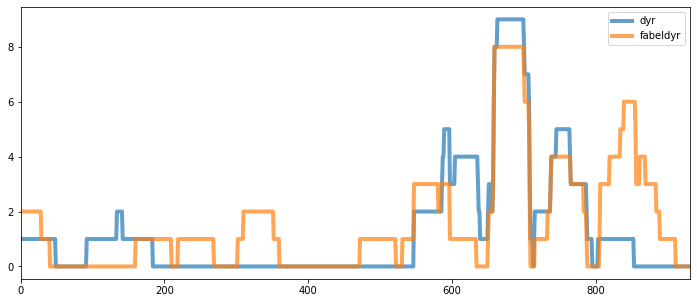

In [43]:
nb.plot_book_wordbags(dugg_bok, 
                      {'dyr': "tigeren kattene katter rottene dragen labbene".split(), 
                       'fabeldyr':"dragen gudinnen skapning skapningen".split(),
                       #'banditt':"røvere drapsmann".split(),
                       #'sted': "ødemarken, landsbyene, torget, bakgården, verdener, skogholt, gårdsplassen".split(", ")
                      }).plot(figsize=(12,5), lw=4, alpha=0.7);

In [53]:
dugg_graf = nb.make_network_graph(dugg_bok, list(dugg_forskjell.index)[:200])

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


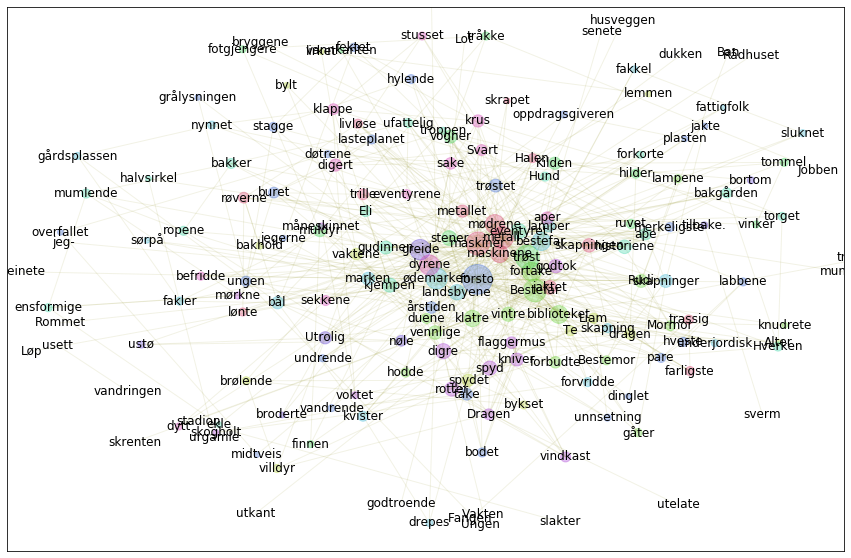

In [128]:
gnl.show_graph(dugg_graf, spread=0.6, fontsize=12);

In [69]:
gnl.show_communities(dugg_graf)

spydet-vaktene :  spydet, vaktene, dragen, Liam, Te, brølende, bykset, villdyr, bakhold, unnsetning, bylt, lirket, Alter, jegerne, lemmen

Bestefar-fortake :  Bestefar, fortake, biblioteket, klatre, vintre, vennlige, Rudi, forbudte, duene, Mormor, hodde, Bestemor, gåter, lampene, knudrete, utelate, skrenten, Ban, trappetrinn, senete, utkant

trøst-stener :  trøst, stener, vogner, Kilden, muldyr, ruvet, hilder, tråkke, tommel, finnen, vinker, fotgjengere, vannkanten, Jobben, husveggen, bryggene

eventyret-kjempen :  eventyret, kjempen, historiene, gudinnen, ape, årstiden, Eli, bakker, bakgården, ufattelig, ropene, mumlende, Hund, Hverken, torget, ensformige, mørkne, forkorte, troppen, halvsirkel, ekle, jakte, urgamle

ødemarken-bestefar :  ødemarken, bestefar, landsbyene, skapninger, marken, lamper, forvridde, skapning, sluknet, underjordisk, fakkel, fattigfolk, sørpå, munnet, folkemunne, Løp, steinete, godtroende

forsto-greide :  forsto, greide, dyrene, trøstet, Utrolig, aper, tåke, n

In [56]:
dugg_communities = gnl.community_dict(dugg_graf)

In [50]:
def subdict(d, keys):
    return {key:d[key] for key in keys if key in d}

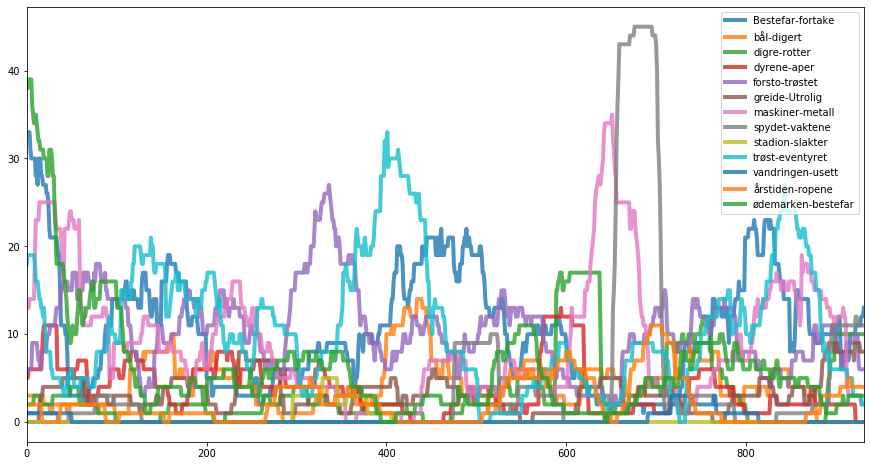

In [70]:
nb.plot_book_wordbags(dugg_bok, 
                      dugg_communities,
                      ).plot(figsize=(15,8), lw=4, alpha=0.8);

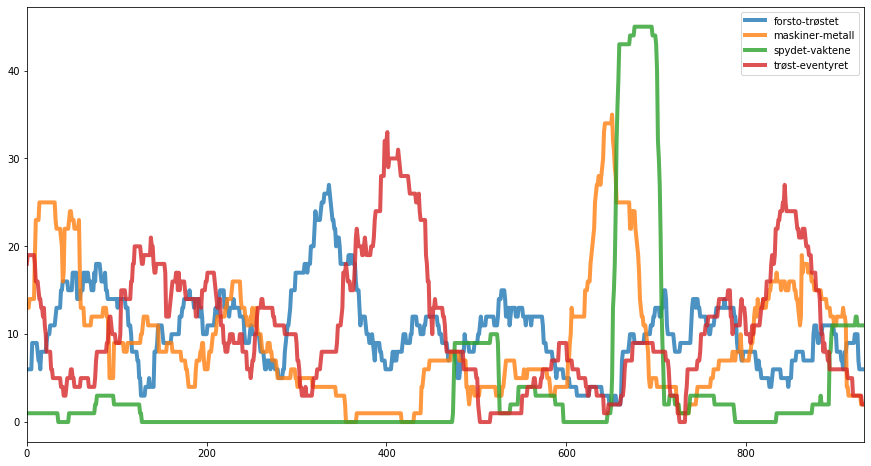

In [72]:
nb.plot_book_wordbags(dugg_bok, 
                      subdict(dugg_communities,["spydet-vaktene", "trøst-eventyret", "maskiner-metall", "forsto-trøstet"]) ,
              ).plot(figsize=(15,8), lw=4, alpha=0.8);

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\dhlab\nbtext.py:1302: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(rammer)
C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


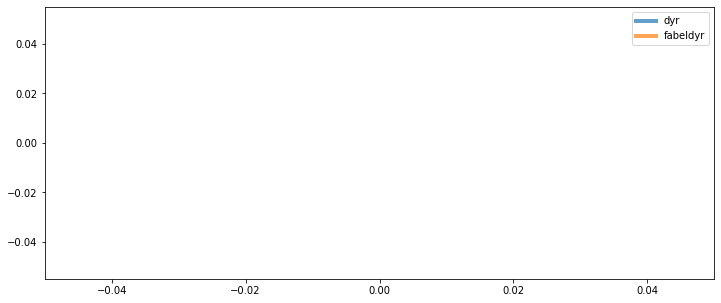

In [132]:
nb.plot_book_wordbags(blindpassasjer, 
                      {'dyr': "tigeren kattene katter rottene dragen labbene".split(), 
                       'fabeldyr':"dragen gudinnen skapning skapningen".split(),
                       #'banditt':"røvere drapsmann".split(),
                       #'sted': "ødemarken, landsbyene, torget, bakgården, verdener, skogholt, gårdsplassen".split(", ")
                      }).plot(figsize=(12,5), lw=4, alpha=0.7);

In [155]:
blind_graf = nb.make_network_graph(blindpassasjer, list(blind_forskjell.index)[:300])

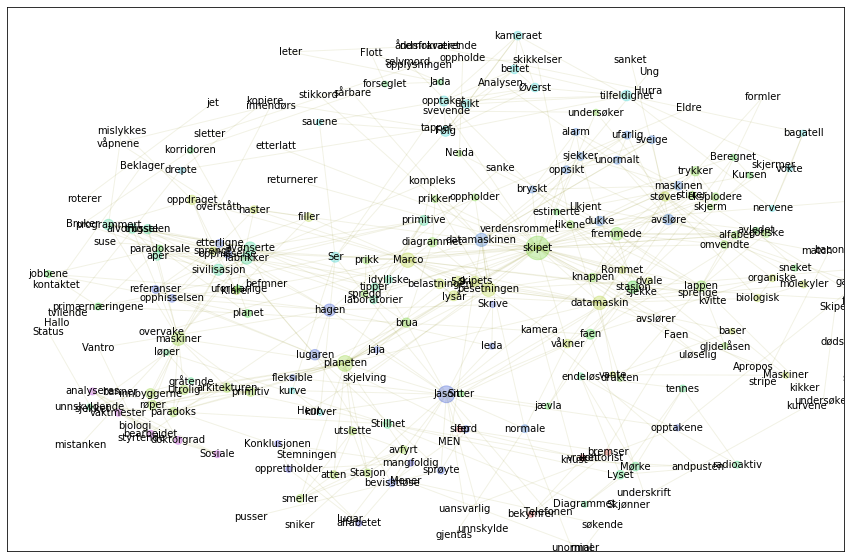

In [156]:
gnl.show_graph(blind_graf, spread=0.4, fontsize=10);

In [173]:
gnl.show_communities(blind_graf)

skipet-besetningen :  skipet, besetningen, fremmede, lappen, skipets, lysår, belastningen, 5,9, diagrammet, brua, trykker, våkner, knappen, stirrer, eksplodere, gotiske, omvendte, alfabet, oppholder, spredd, dvale, prikker, prikk, Rommet, undersøker, Neida, skjerm, verdensrommet, avslører, uløselig, formler, kvitte, svevende, Apropos, oppholde, returnerer, Ung, etterlatt, kikker, skjelving, skjermer, Hent

Marco-oppdraget :  Marco, oppdraget, filler, sprengt, haster, Klarer, mislykkes, sprenge, suse

datamaskin-støvet :  datamaskin, støvet, organiske, molekyler, biologisk, vante, Maskiner, baser, Analysen, sanket

planeten-maskiner :  planeten, maskiner, innbyggerne, røper, primitiv, Utrolig, paradoks, arkitekturen, Stasjon, atten, utslette, avfyrt, smeller, mistanken

kontaktet-Beklager :  kontaktet, Beklager

stasjon-faen :  stasjon, faen, planet, jobbene, primærnæringene, paradoksale, uforklarlige, jævla, sneket, Kursen, Sitter, avledet, Beregnet, estimerte, forlengelse, forhistoris

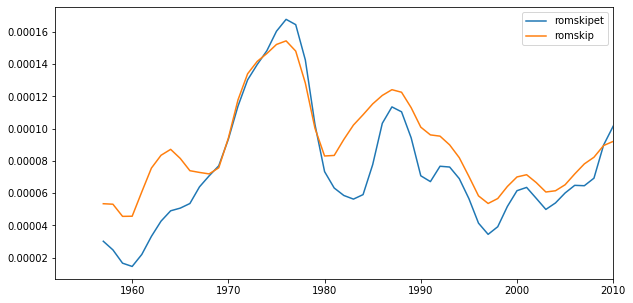

In [178]:
nb.nb_ngram('romskipet, romskip').rolling(window=4).mean().plot(figsize=(10,5))

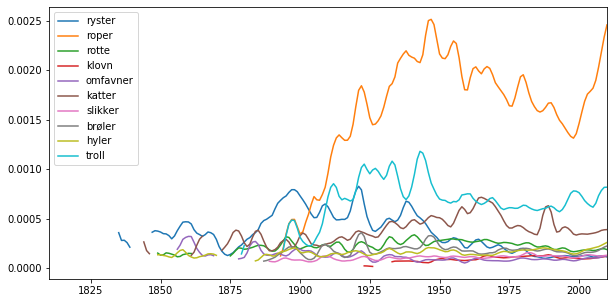

In [186]:
nb.nb_ngram('ryster, roper, rotte, klovn, omfavner, katter, slikker, brøler, hyler, troll, forkledd').rolling(window=4).mean().plot(figsize=(10,5))

In [180]:
skip = nb.book_corpus(words=['romskip', 'romskipet'], ddk="839%", limit=4000)

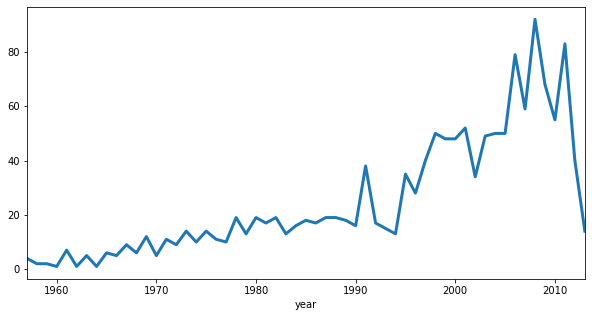

In [185]:
skip.groupby('year').count()['urn'].plot(figsize=(10,5), lw=3)

In [158]:
gnl.show_cliques(blind_graf)

(3, 1) stasjon, Sitter, faen, jævla

(3, 2) røper, innbyggerne, primitiv, Utrolig, paradoks, maskiner, planeten, arkitekturen

(3, 3) lappen, drakten, likene, glidelåsen

(3, 4) fabrikker, idylliske, aper, programmert, maskiner, sivilisasjon, alvorligste, primitive, kompleks, tipper, laboratorier, trusselen, avanserte

(3, 5) Jason, opptakene, uansvarlig

(3, 6) oppsikt, ufarlig, unormalt, datamaskinen, avsløre, sveige

(3, 7) stasjon, forlengelse, forhistoriske

(3, 8) Jason, lugaren, Skrive, opphisselse, leda, sprøyte, opphisselsen, iferd, referanser, hagen, bevisstløse, etterligne

(3, 9) normale, Jason, våkner

(3, 10) Ser, Jason, kurver, kurve

(3, 11) Jason, Jaja, brua, fleksible

(3, 12) bekymrer, slep, vraket, bremser

(3, 13) Sosiale, bearbeidet, vaktmester, analyseres, doktorgrad

(3, 14) tilfeldighet, bagatell, nervene, vokte

(3, 15) tilfeldighet, unikt, Ser, opptaket, Øverst, beitet, kameraet, Følg, sauene

(3, 16) endeløs, radioaktiv, Diagrammet, Mørke, Stillhet, tennes, 

In [142]:
blind_communities = gnl.community_dict(blind_graf)

In [145]:
def subdict(d, keys):
    return {key:d[key] for key in keys if key in d}

In [166]:
nb.urn_concordance(word='JASON', urns=[blindpassasjer], before=10, after=10)

"Blindpassasjer, Bing, Jon, 2011",None,JASON,None
"Blindpassasjer, Bing, Jon, 2011",None,JASON,:
"Blindpassasjer, Bing, Jon, 2011",None,JASON,:
"Blindpassasjer, Bing, Jon, 2011",None,JASON,:
"Blindpassasjer, Bing, Jon, 2011",None,JASON,:


C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\dhlab\nbtext.py:1302: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(rammer)


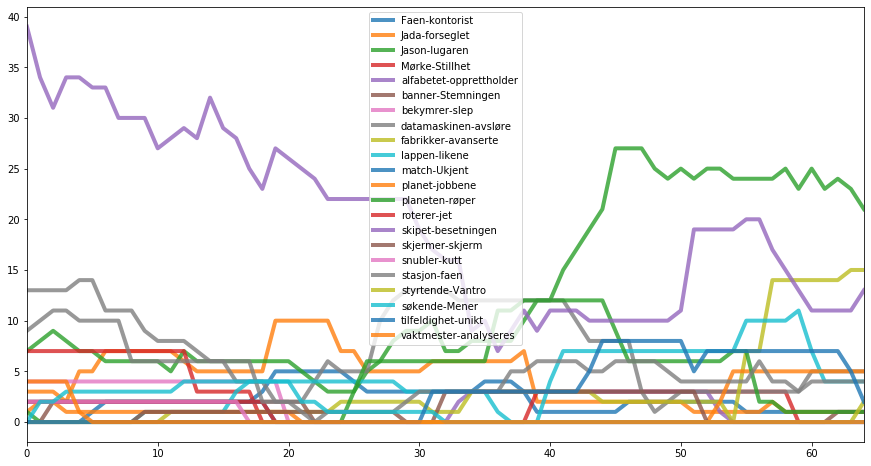

In [167]:
nb.plot_book_wordbags(blindpassasjer, 
                      blind_communities, window=2000, pr=100,
                      ).plot(figsize=(15,8), lw=4, alpha=0.8);

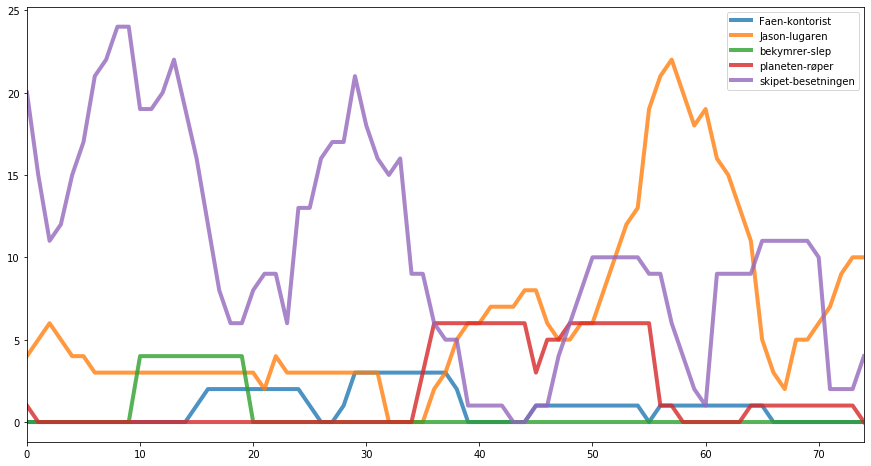

In [172]:
nb.plot_book_wordbags(blindpassasjer, 
                      subdict(blind_communities,[
                          "Faen-kontorist",
                          "skipet-besetningen", 
                          "bekymrer-slep", 
                          "planeten-røper", 
                          "Jason-lugaren"
                      ]) ,
             window=1000 ).plot(figsize=(15,8), lw=4, alpha=0.8);

In [78]:
fabelkorpus0 = nb.book_corpus(subject='fabler', limit=200, trans='')

In [81]:
fabelkorpus1 = nb.book_corpus(subject='Fabler', limit=200, trans='')

In [82]:
fabelkorpus1

,urn,author,title,year
0,2013012506077,"Hansen, Thore",Drømmen om de blomstrende kaninene,1979
1,2008031004030,,Hugin &amp; Munin,1995
2,2007101100016,"Schwarz, Johanna",Sølvfuglen,1991
3,2009051100111,"Newth, Philip",Drusilde,1990
4,2008061200050,"Brekke, Toril",grå dvergens hemmelighet,1992
5,2007111904033,"Mitchell, Ingelil",fabel,1991
6,2007032901077,,Barnas verden,1962
7,2008011004137,"Kahsay, Abiel",Fisken og apen ; Eselet og herr Hailu,1993
8,2009061704021,,Rottenes plan og andre forunderlige fabler,2003
9,2012082205037,"Hoff, Trygve",Trollfjell her nord,1982


In [80]:
fabelkorpus

,urn,author,title,year
0,2014061806049,"Newth, Mette",Oppdagelsen,1984
1,2014111748008,,Ord och bilder för barn,1979
2,2008031004030,,Hugin &amp; Munin,1995
3,2007111904033,"Mitchell, Ingelil",fabel,1991
4,2014032805086,"Frøstrup, Johan Christian",Dyr i tro og overtro,1989
5,2008090500004,"Bringsværd, Tor Åge",Medusa,1998
6,2008061604073,"Hansen, Thore",Høstfabel,1996
7,2013080706111,"Hoff, Trygve",Eventyr langs leia -,1984
8,2009061704021,,Rottenes plan og andre forunderlige fabler,2003
9,2013012506077,"Hansen, Thore",Drømmen om de blomstrende kaninene,1979


In [233]:
blind_df.loc[['JASON', 'Jason']]

,0
JASON,0.013074
Jason,0.003298


In [235]:
'JASON'.upper()

'JASON'

In [241]:
'JASPON2'.isalpha()

False

In [243]:
caps = [x for x in blind_df.index if x.upper() == x and x.isalpha()]

In [247]:
nb.urn_concordance(word=caps, urns=nb.pure_urn(blindpassasjer))

"Blindpassasjer, Bing, Jon, 2011",None,AKERON,None
"Blindpassasjer, Bing, Jon, 2011",None,AKERON,:
"Blindpassasjer, Bing, Jon, 2011",ELIS går bort til,AKERON,og gir ham et kyss
"Blindpassasjer, Bing, Jon, 2011",None,AKERON,: ( ler høflig )
"Blindpassasjer, Bing, Jon, 2011",None,AKERON,og LEDA begynner å sjekke
"Blindpassasjer, Bing, Jon, 2011",None,JASON,None
"Blindpassasjer, Bing, Jon, 2011",None,JASON,:
"Blindpassasjer, Bing, Jon, 2011",None,JASON,:
"Blindpassasjer, Bing, Jon, 2011",None,JASON,:
"Blindpassasjer, Bing, Jon, 2011",None,JASON,:
"Blindpassasjer, Bing, Jon, 2011",None,LEDA,None


In [ ]:
nb.urn_coll('JASON')

In [257]:
nb.book_corpus(subject='abortpolitikk')

,urn,author,title,year
0,2008120300159,"Elvbakken, Kari Tove",Abortpolitikkens utfordringer,2001


In [258]:
nb.best_book_urn('Dewey')

[[2013012506034, 'Høeg, Tom Arbo', 'Norske lover', 1988],
 [2015021108094, 'Høeg, Tom Arbo', 'Lovers standardtittel', 1986],
 [2015051308237, 'Aasen, Joar', 'Dewey', 2008],
 [2012020908121, 'Nørstebø, Sigurd', 'John Deweys oppsedingsteori', 1953],
 [2014070308068, '', 'Lovers standardtittel', 1985],
 [2013042306111, 'Myron, Vicki', 'Dewey', 2009],
 [2013011006066,
  'Eikseth, Astrid Grude',
  'Etiske perspektiver på læreres og førskolelæreres pedagogiske erfaringer',
  2008],
 [2013011806021, 'Tatlock, Ann', 'Så jeg ikke går meg vill', 2007],
 [2013042505073, 'Tatlock, Ann', 'Så jeg ikke går meg vill', 2007],
 [2015062408076, '', 'Utdanning til demokrati', 2000],
 [2011052008168, 'Østbye, Guri Lorentzen', 'Barn, kunst, danning', 2005],
 [2013042506095, 'Aasen, Joar', 'Ettertanken', 2009],
 [2013071208017, 'Cole, Jackson', 'I skyggene venter døden', 2013],
 [2008060600061, '', 'Oppdragelse til det moderne', 1989],
 [2009033104046, '', 'many faces of philosophy of education', 2002],
 [20